# Introduction

In this part, the use cases Text Classification and more precisely the downstream task Keyword Extraction will be presented. Text Classification is one of the important and typical tasks in supervised machine learning. It can be described as the process of categorizing text into organized groups. By using Natural Language Processing (NLP), text classifiers can automatically analyse text and then assign a set of pre-defined tags or categories based on its content. There are many interesting applications for text classification such as Question Answering, Sentiment Analysis, Text Summarization, Spam Detection, Topic Detection, and others. 
In this notebook, the downstream task Keyword Extraction with Transformer models will be presented. Keyword Extraction is the task of selecting words or phrases that best represent a text. It can also be described as an attempt to summarize the meaning of a document within just a few words. Formally speaking, this is an NLP task, whose aim is to embed a given paragraph once as a whole and once n-grams separately and then calculate the distances between the candidate embeddings and the text. The embeddings of the top *k* words that are closest to this of the text are chosen to be the keywords.


## The Process of Keyword Extraction

The first step to extract keywords is to set the size of the n-grams. Usually, it is between one and three words, very rarely four. Then a list of all possible n-grams from the text is created. It is important that all verbs, prepositions, and adjectives are removed, as they are almost never given as key phrases by authors. This leaves us with a list of n-grams of nouns, called candidates. The candidates and the text are embedded using a language model. Here, many different language models can be used. They vary in their architecture and performance. Below, the most widely used models for keyword extraction and their differences, together with their strengths and weaknesses will be discussed. Choosing the right model is crucial and not trivial. How well they perform usually depends on the specific task and use case. After the embeddings are computed, the semantic distance between word and text embeddings is measured, normally using cosine similarity. Lastly, those n-grams are chosen, whose distance is closest to the text embedding.
Similar techniques exist to improve the chosen key phrases. It is often the case, that synonyms are chosen as keywords since their distances to the text embeddings are similar. However, synonyms are not vey useful as key phrases. Therefore, diversity of the output should be ensured. One way to do that is by using the Maximal Margin Relevance (MMR) criterion [Carbonell, 1998]. It achieves that by 	selecting the keywords that are the most similar to the document and for each next candidate its similarity to the already chosen keywords is considered as well. The other technique is called Max Sum Similarity (MSS) and it strives to reduce redundancy by 	extracting the combinations that are the least similar to each other by maximizing the similarity to the text while minimizing the similarity between the candidates. Unfortunately, both strategies come with a trade-off between diversity and accuracy.


In the following section the background of automated keyword extraction will be presented together with other ways to approach this task using basic statistical methods, transformer-based models or both combined. The four different language models will be presented. With the help of the python package WordWise, keyword extraction will be showcased and the ease of use of this package will be presented. Based on this package and the data set KP20K the models will be evaluated and compared. Afterward, the results will be discussed and finally the findings of this work will be concluded.

# Literature Review

Automated Keyword Extraction has been of interest to developers for quite some time. Hence, numerous approaches exist to find phrases that provide a compact representation of a document’s content in an automated manner.
Previous work on document-oriented methods of keyword extraction has combined natural language processing approaches to identify part-of-speech (POS) tags that are combined with supervised learning, machine-learning algorithms, or statistical methods. [Rose, 2010]

One of the base algorithms for keyword extraction is using TF-IDF, short for **t**erm **f**requency–**i**nverse **d**ocument **f**requency. The term frequency is calculated by simply counting the occurrences of a word in a document. There exist multiple ways to adjust the TF, for example by capturing the raw count of the words in comparison to the length of the text. The inverse document frequency calculates how common a word is in a text corpus, such as Wikipedia, by dividing the number of the documents that contain a word by the total number of documents. The result is that the logarithm of the division. The TF-IDF is conducted by multiplying TF and IDF and the higher the score, the more relevant the word is for that document. 

Matsuo and Ishizuka (2004) apply a chi-square measure to calculate how selectively words and phrases co-occur within the same sentences as a particular subset of frequent terms in the document text. The chi-square measure is applied to determine the bias of word co-occurrences in the document text which is then used to rank words and phrases as keywords of the document. Matsuo and Ishizuka (2004) state that the degree of biases is not reliable when term frequency is small. The authors present an evaluation on full text articles and a working example on a 27-page document, showing that their method operates effectively on large documents.

Another approach for keyword extraction is TextRank – a graph-based ranking model for text processing [Mihalcea, 2004]. In the graph, each word is presented as a node and the edges are constructed by observing the co-occurrence of words inside a moving window of predefined size between 2 and 10. TextRank is completely unsupervised and that makes it easily portable to other text collections, domains, and languages. Nevertheless, the authors report that TextRank achieves its best performance when only nouns and adjectives are selected as potential keywords.

In another work, instead of using only statistical data such as TF and n-grams, linguistic knowledge is also added to the equation. In detail, extracting NP-chunks gives a better precision than n-grams, and by adding the POS-tag(s) assigned to the term as a feature, a dramatic improvement of the results is obtained, independent of the term selection approach applied. [Hulth, 2003]
In their paper, Rose et al. (2010) develop an unsupervised, domain-independent, and language-independent method for extracting keywords from individual documents. Rather than omitting the stopwords such as ‘the’, ‘a’, ‘of’, etc., they use them as a delimiter to split the text into candidate keywords. Next, a graph of co-occurrences is generated where each candidate is assigned a **member word** score, based on the degree and frequency of the vertices in the graph. This approach proved to be faster than TextRank while achieving higher precision and comparable recall scores.

YAKE! is **Y**et **A**nother **K**eyword **E**xtractor that relies on statistical text features extracted from individual documents to identify the most relevant keywords in the text. [Campos, 2020] YAKE! defines a set of five features capturing keyword characteristics which are heuristically combined to assign a single score to every keyword. The lower the score, the more significant the keyword will be. Experimental results carried out on top of twenty datasets have shown that YAKE! significantly outperforms other unsupervised methods on texts of different sizes, languages, and domains.
After the Transformer came out in 2018, researchers tried incorporating it into many different natural language processing tasks, keyword extraction being one of them. In the following sections a Transformer-based approach will be presented. For a complete overview of the keyword extraction approaches, however, first some unsupervised automated keyword extraction models will be presented that combine the transformer architecture with simpler techniques.
The Phraseformer is a model, that combines both Transformer and Graph Embedding techniques. For each keyword candidate, the text and the structure learning representation are concatenated and presented as a vector.  Apart from that, the task is handled as a sequence labelling problem solved using classification task. The authors demonstrate that the combination of BERT and graph embeddings is more powerful that either of the approaches alone as it can better represent the semantic of the words and therefore outperforms the models using only one of the techniques. 

Rungta et al. (2020) also explore the keyword extraction as a sequence labelling task to take advantage of the Transformer architecture and additionally use pre-trained weights to initialize the embedding layer of their model.

KeywordMap [Tu, 2021] also makes use of the attention scores provided by Transformer-based models and rely on links between words to build a keyword network. Then using a novel algorithm called Attention-based Word Influence (AWI), they manage to calculate the importance of each keyword candidate to the network. Moreover, KeywordMap, is developed to support multi-level analysis of keywords and keyword relationships through coordinated views.

By pretraining a Transformer-based language model on a domain-specific corpus and adapting its architecture for the task at hand, the TNT-KID model addresses the flaws of both supervised and unsupervised techniques for keyword extraction. [Martinc, 2021] This model outperforms existing models on numerous datasets, even though it only expects a small amount of training data.


# Imports

We shall start by importing the needed packages for keyword extraction.

In [ ]:
!pip install sentence-transformers
!pip install spacy transformers
!pip install wordwise
!python -m spacy download en_core_web_sm

import pandas as pd
import textwrap
import json
from tqdm import tqdm
from wordwise import Extractor
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer

# Experiments

In this part the experimental set up will be presented and the results will be discussed. For each model, first a description if its architecture will be presented, then an example will be shown using the python package WordWise and only 300 observations for simplicity. Then, the code for the experiment will be presented and the results will be shown. Lastly, the evaluation will be summed up.

**Disclaimer**: The models take time to compute the whole dataset, which is longer than what Colab allows its users. For this reason, the whole dataset is computed separately on a CPU and only the final results are being presented here. The same code has been used as in the Example part, without the restriction to only compute the first 300 entries.

## Set up

In order to compare the models, we need a common basis. For this experiment, the data set KP20k was chosen. [Meng, 2017] This data set consists of 20,000 abstracts of computer science papers, their titles and the keywords assigned by the authors. For consistence purposes, all models will be tested with the Pyton package WordWise. [Tae, 2021] At the end of this notebook, you will find another Python package that is useful for Keyword Extraction. Both packages can be used without additional pretraining and could be directly used.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/IS Seminar

Mounted at /content/gdrive
/content/gdrive/My Drive/IS Seminar


In [ ]:
count = 0
count_dict = {}
candidates_dict = {}
abstracts_dict = {}
keywords_dict = {}

#Define the n-gram range (how long the keyword and phrases could be)
n_gram_range = (1, 2)
#Define the stopwords
stop_words = "english"

#for each line of the file
for line in open("kp20k_testing.json", 'r'):
    line = json.loads(line)

    #get the title, abstract and keywords
    title = line['title']
    abstract = line['abstract']
    keywords = line['keyword']

    #Convert the abstracts to a matrix of token counts
    countVect = CountVectorizer(ngram_range=n_gram_range, 
                                stop_words=stop_words).fit([abstract])
    
    #Get output feature names for transformation
    candidates = countVect.get_feature_names_out()

    #Add the abstracts, keywords and candidates to dictionaries
    abstracts_dict.update({title : abstract})
    keywords_dict.update({title : keywords.split(';')})
    candidates_dict.update({title : candidates})

    #Only get a subset of the data
    count += 1
    if count == 300:
      break


Now that we have the data, we can proceed and test it on the different models. In the following part, a short summary of each model will be presented and keywords will be extracted. Then the results will be analyzed and the Mean Average Precision (MAP) will be calculated. 

## Empirical Results

### Evaluation metric

Before we dive into the different models, it is important to take a look at the evaluation and what would make one model better than another one. Undeniably, a good Keyword Extraction model is one, which is able to choose those words from a text, which best describe it. With the help of the data set, we have a common ground for the models, which would allow us to compare them. Intuitively, one could say that the better model is one that manages to predict more of the keywords of a text that were given by its author. As mentioned before, the model embeds the words from the text and then selects the ones with the smallest distance to the text embedding. This means that the models are only able to choose keywords that are already present in the text itself. In reality, authors do not always only choose keywords from the abstract, but usually opt for more general terms, contextual synonyms or words that describe the whole paper, which are simply not present in the abstract. Therefore, it is simply impossible for a Keyword Extraction model to show a high performance and to output *all keywords* given by the author. When evaluating models, one should always keep that in mind and expect lower performance scores.

Further limitation is number of keywords *k* that a model should produce. Different texts shall by nature correspond to different number of key phrases. [Yuan, 2020] But this aspect has not been widely considered in the past years when evaluating a Keyword Extraction model. Instead, a fixed number of keywords has been generated, typically 5 or 10, which resulted in attempts to match a fixed number of outputs against a variable number of true keywords. In the paper by Yuan, it was shown that for the several commonly used key phrase generation datasets the average number of key phrases per data point can range from 5.3 to 15.7, with variances sometimes as large as 64.6, which resulted in F1 score for the oracle model on the KP20K dataset being 0.858 for k = 5 and 0.626 for k = 10. The number of generated key phrases used for evaluation can have a critical impact on the quality of the resulting evaluation metrics. Therefore, as suggested by the authors of the paper, here we will be using a variable length of the key phrases. Namely, for each abstract the models will produce as many keywords as the number of the ground truth keywords.

However, another aspect to consider is the order of the keywords proposed by the model. The model outputs the top *k* words, whose embeddings are as close to the embedding of the text, which means that the first suggested keyword is the closest and the distance increases with the following suggestions. Therefore, only comparing the predicted keywords to the true keywords would be not entirely correct. Yuen et.al. propose to change the order of the ground truth keywords by sorting them by their order of occurrence and to append the key phrases that do not appear in the text to the end. Then they use a variable number of predicted keywords to calculate the F1 score. This is an interesting workaround, but there are other limitations to both the approach and the F1 score. Imagine the simplified situation in which a text has 5 keywords. Two models A and B are being examined and both have only one correct prediction and it is the same keyword. Now model A predicts it at the first place, i.e. with closest representation to the text and model B puts it on 5th position. If we only consider whether the predicted keyword is present in the set of ground truth keywords, this would mean that both models performed equally well. However, model A was able to capture the importance of this keyword better and extracts relevant key phrases higher up the order as compared to model B. Therefore, we need a metric that is able to capture and evaluate this behaviour as well. 

A metric like that is the Mean Average Precision (MAP). It is a metric that penalizes if irrelevant key-phrases are extracted higher up the order and gradually decrease the significance of the errors (extraction of irrelevant key-phrase) as we go down the list of extracted key-phrases. [Shrivastava, 2020] The MAP is calculated as follows: for each predicted keyword the precision of the list until this keyword is calculated. Next, the average sub-list precision scores are computed. Finally, the mean average precision for all documents is calculated. This approach is illustrated in the figure below:


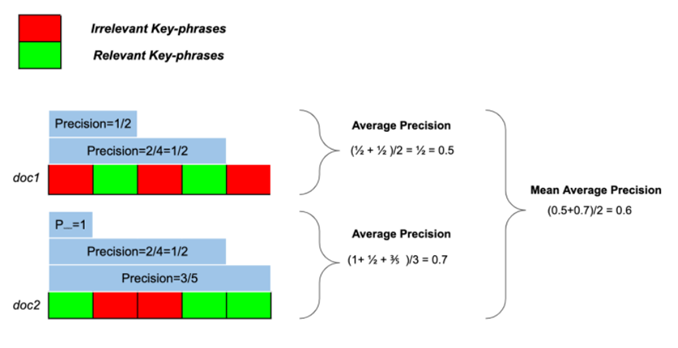

When comapring the predicted keywords to the ground truth, it is imortant that both lists are stemmed. For the case when an author has given the phrase 'NLP models' as a key segment, but the model predicts 'NLP model', a not stemmed output would be evaluated as incorrect. If both lists are stemmed, however, then they both would be in singular form and the prediction would be correct.

In this notebook, the Porter Stemmer will be used.

In [ ]:
ps = PorterStemmer()

#### Evaluation Metric: MAP (code)

In [ ]:
# calculate the average precision for each document using stemmed output
def calc_ap(true_kw, pred_kw):
  res = 0
  corr = 0
  true_kw_stemmed = [ps.stem(kw) for kw in true_kw]
  pred_kw_stemmed = [ps.stem(kw) for kw in pred_kw]
  list_length = min(len(true_kw_stemmed), len(pred_kw_stemmed))
  for i in range(0, list_length):
    if pred_kw[i] in true_kw:
      corr += 1
      res += corr/(i+1)
  if corr == 0:
    return 0
  else:
    return res/corr

In [ ]:
# calcuate the mean average precision
def calc_map(abstracts_dict, true_kw_dict, pred_kw_dict):
  avg_prec_list = []
  with tqdm(total=len(abstracts_dict)) as pbar:
    for key in abstracts_dict.keys():
      true_kw = true_kw_dict[key]
      pred_kw = pred_kw_dict[key]
      avg_prec_list.append(calc_ap(true_kw, pred_kw))
      pbar.update(1)
  return sum(avg_prec_list) / len(avg_prec_list)

### Running Example: Text

For each model the same document will be used in order to have the same basis for comparison.

In [ ]:
doc = '''BERTopic is a topic clustering and modeling technique that uses Latent Dirichlet Allocation. Bertopic can be used to visualize topical clusters and topical distances for news articles, tweets, or blog posts. Bertopic can be installed with the “pip install bertopic” code line, and it can be used with spacy, genism, flair, and use libraries for NLP from Python programming language. To understand and use Bertopic, Latent Dirichlet Allocation should be understood.'''

### BERT

#### Model

BERT is a transformer model that allows us to transform phrases and documents to vectors that capture their meaning. BERT stands for Bidirectional Encoder Representations from Transformers and it uses a bidirectional transformer architecture stacking encoders from the original transformer on top of each other. This model is designed to pretrain deep bidirectional representations from unlabelled text by jointly conditioning on both left and right context in all layers. [Devlin, 2019] Unlike the architecture of the GPT models, where a left-to-right architecture is used and the tokens only attend to previous tokens in the self-attention layers, BERT incorporates context from both directions. 

What makes BERT so powerful and widely used in many different NLP tasks is its unified architecture across different tasks. It is pretrained on a large amount of data and then it can be fine-tuned to fit any other downstream task such as Question Answering, Summarization, Hate Speech Detection, Keyword Extraction, etc.


##### Pretraining

The model is trained on the BooksCorpus (800M words) [Zhu, 2015] and English Wikipedia (2,500M words). For the training two training schemes are used: Masked Language Modelling and Next Sentence Prediction.

###### Masked Language Modelling

All standard language models can only be trained left-to-right or right-to-left to prevent a target leak from the future words since that would allow the masked word to be predicted easily by the model. In BERT, however, this is not the case and all tokens, previous and following, are visible. To compensate for that, the developers of BERT decided to implement a different approach, called Masked Language Modelling (MLM). Here, a part of the input tokens, usually 15%, are “hidden” (masked) and the model must predict them by looking at the context of the sentence. Unlike the denoising auto-encoders, here the model is concentrated entirely on predicting the masked word, and not the whole sentence. Since the [MASK] token does not appear during fine-tuning, this could potentially cause bias issues. Therefore, the authors use this token in 80% of the time. In 10% of the time, they use a random token and in the other cases they leave the token unchanged. Then, this token will be used to predict the original token with cross entropy loss. This way, the model is able to understand bidirectional context within a sentence.

###### Next Sentence Prediction

The other objective for pretraining is Next Sentence Prediction, which produces a binary output C (figure below), which predicts whether two sentences follow each other in a text. Its goal is to help the model understand relationships between sentences. 50% of the examples in the pretraining data are consecutive sentences from the text corpus and in the other 50% are formed by combining random sections from several documents. 

##### Input representation 

Now that we understand the tasks on which BERT is trained, let’s see how the data is fed to the model. The authors used WordPiece embeddings [Wu, 2016] with a 30,000-token vocabulary to embed the words. All sentence pairs that are given to the model are packed into the same sequence with the special token [CLS] at the beginning. In order for the model to understand where the first sentence ends and where the second sentence starts, a dividing token [SEP] is placed between them. To make this separation even more visible to the model, a learned embedding is added to every token indicating whether it belongs to the first or to the second sentence. This embedding is called Segment Embedding. Lastly, since the model loses sight of the order of the tokens, positional embeddings are added, showing the exact position of each word in the sequence. For a given token, its input representation is constructed by summing the corresponding token, segment, and position embeddings. [Devlin, 2018] A visualization of this construction can be seen in the figure below.

##### Fine-tuning

BERT is pretrained on a large set of data, but this is not enough for the model to produce the correct output for a given NLP problem yet. To do that, it must be fine-tuned for the different tasks using an appropriate data set. Each downstream task has separate fine-tuned models, but they are all initialized with the same pre-trained parameters, which makes fine-tuning relatively inexpensive. Fine-tuning is straightforward since the self-attention mechanism in the Transformer allows BERT to model many downstream tasks by swapping out the appropriate inputs and outputs and finetuning all parameters end-to-end. [Devlin, 2018] 

One of the downstream tasks given in the paper by Devlin is Question Answering. Here, the model is given a question in the first part of a sentence and a paragraph, which contains the answer as the second part. BERT must identify the start and end index of where the answer is given in the reference paragraph. [Presson, 2021] To do that, two linear layers are added: one to predict the start index and another one for the end index. Then, a cross entropy loss is calculated to train this classification.


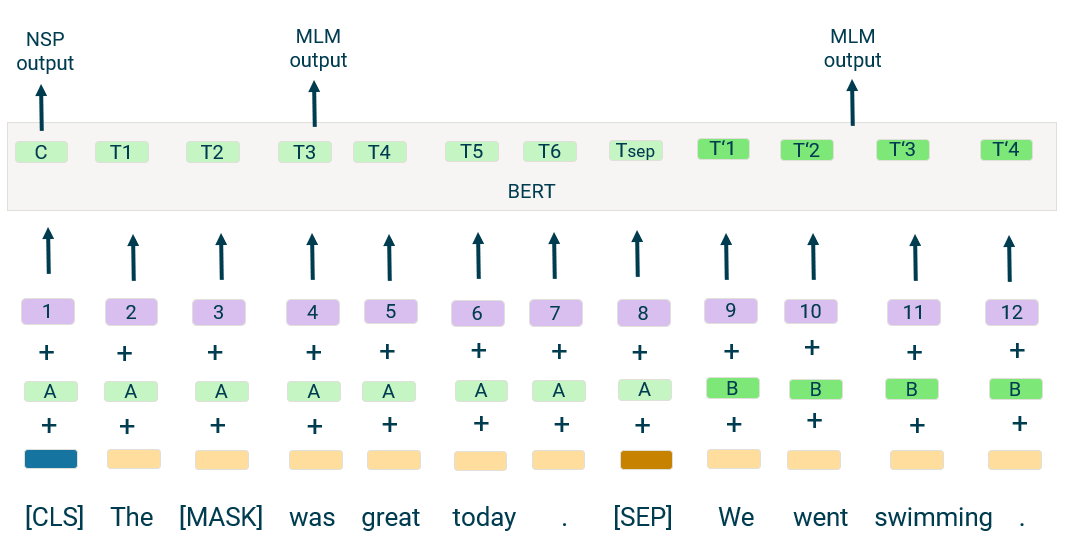

Both for the Example and the Experiment the model 'bert-case-uncased' has been used.

#### Example

In [ ]:
extractor = Extractor(bert_model="bert-base-uncased")
bert_keywords_example = extractor.generate(doc, top_k=5)
print(bert_keywords_example)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['distances', 'code', 'news', 'flair', 'dirichlet']


#### Experiment

In [ ]:
bert_suggested_keywords_dict = {}
with tqdm(total=len(abstracts_dict)) as pbar:
    for key in abstracts_dict.keys():
      abstract = abstracts_dict[key]
      try:
        keyword_suggestions = extractor.generate(abstract, top_k=3)
      except RuntimeError:
       b = abstract[0:1200]
       keyword_suggestions = extractor.generate(b, top_k=3)

      bert_suggested_keywords_dict.update({key : keyword_suggestions})
      pbar.update(1)  

#### Evaluation

##### MAP of the subset

In [ ]:
calc_map(abstracts_dict, keywords_dict, bert_suggested_keywords_dict)

100%|██████████| 300/300 [00:00<00:00, 1876.75it/s]


0.09749999999999996

##### MAP of the whole dataset

MAP of BERT is:  0.12156832939930703

### RoBERTa

#### Model

BERT was a ground-breaking model, that achieved great performance. Many researchers started analysing it and developing their own improved versions of it. They were impressed by the innovative architecture of BERT but realized that it is largely undertrained. Baevski et al. (2019) demonstrated that increasing data size can result in improved end-task performance. Hence, the developers from Facebook AI decided to modify and enhance the existing training procedure and presented the new model Roberta, **R**obustly **o**ptimized BERT **a**pproach.

First, more training data was collected: they used 10 times as much data. Next to the data used for BERT, they added the CC-News corpus [Nagel, 2016], OoenWebText [Gokaslan, 2019], Stories [Trinh, 2018], all together summing up to over 160 GB data.

Furthermore, they removed the NSP objective from the pretraining part. In BERT the total combined length of a sentence pair must be less than 512 tokens, which means that the model is not able to learn long-range dependencies. It was noticed that this hurts the performance of downstream problems. After removing this scheme, the performance of the model remained the same or was improved in some cases.

Next, BERT’s static masking method was replaced by a dynamic one. To prevent the model from using the same mask for each training instance in every epoch, the training data was repeated 10 times and every time, the masked word would be different, meaning the sentence would be the same but the words masked would be different. [Singh, 2021] 

Further, Facebook AI decided to use bigger mini batches. They show that 1M steps, batch size of 256 has equivalent computational cost to 31K steps, batch size of 8K. [Liu, 2019] At the same time it improved the perplexity of the MLM objective and the final accuracy. What is more, large batches have the benefit that they are also easier to parallelize via distributed parallel training.

Additionally, they swapped the character-level byte-pair encoding (BPE) by one that uses bytes as the base for subword units. This enables to model to learn a subword vocabulary of a small size, without stumbling across unknown tokens. Even though in some downstream tasks this objective decreases the performance of the model, it is still the preferred approach, as this allows for all words to be used without additional pre-processing such as tokenization and stemming. By this, the advantages of a universal encoding scheme are believed to outweigh the minor degradation in performance.

All these changes resulted in an improved performance by 2-20% on the different downstream tasks in comparison to BERT.


Both for the Example and the Experiment the model 'roberta-base' has been used.

#### Example

In [ ]:
extractor = Extractor(bert_model="roberta-base")
roberta_keywords_example = extractor.generate(doc, top_k=5)
print(roberta_keywords_example)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['technique', 'programming', 'modeling', 'topical clusters', 'libraries']


#### Experiment

In [ ]:
roberta_suggested_keywords_dict = {}
with tqdm(total=len(abstracts_dict)) as pbar:
    for key in abstracts_dict.keys():
      abstract = abstracts_dict[key]
      try:
        keyword_suggestions = extractor.generate(abstract, top_k=3)
      except RuntimeError:
       b = abstract[0:1200]
       keyword_suggestions = extractor.generate(b, top_k=3)

      roberta_suggested_keywords_dict.update({key : keyword_suggestions})
      pbar.update(1) 

#### Evaluation

##### MAP of the subset

In [ ]:
calc_map(abstracts_dict, keywords_dict, roberta_suggested_keywords_dict)

100%|██████████| 300/300 [00:00<00:00, 2334.49it/s]


0.09666666666666664

##### MAP of the whole dataset

MAP of RoBERTa is:  0.11299258861212934


### DistilBERT

#### Model

A group of researchers from Hugging Face decided to go in the other direction: instead of increasing the performance of the model, to develop a model that replicates the performance of BERT but takes significantly less time to train. They noticed that the language models keep on getting larger and larger and they are trained on bigger data sets, but with that they are also becoming more computationally expensive. This not only means that people need expensive GPUs to use them, but also raised concerns about the environmental impact of scaling exponentially computing requirements of these models. [Sanh, 2019] For that they incorporated a technique called knowledge distillation, also known as teacher-student learning, with which the size of the BERT model was decreased by 40%, while maintaining 97% of its language understanding capabilities and being 60% faster. [Sanh, 2020]

Knowledge distillation [Bucila et al., 2006, Hinton et al., 2015] is a compression technique in which a compact model is trained to reproduce the behaviour of a larger model or an ensemble of models. The student model is taught to generalize as the teacher model by matching its output distribution and it prevents the model to be too sure about its prediction. 

Classification models are trained to predict the correct output with a softmax function using log-likelihood. The idea is that the correct output should get high probability whereas all other candidates should receive low probabilities, preferably close to zero. However, the differences between these low probabilities may have an impact on the generalization of the model. Hence, instead of using a cross-entropy loss with one-hot encoded distribution of the true label, DistilBERT uses a cross-entropy loss over the probabilities produced by BERT. This objective results in a rich training signal by leveraging the full teacher distribution. [Sanh, 2020] The final training objective is a linear combination of the distillation loss Lce with the supervised
training loss, in our case the masked language modeling loss Lmlm.


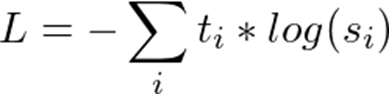

With t the logits from the teacher and s the logits of the student

The architecture of DistilBERT generally follows this of BERT with some modifications. Inspired by the RoBERTa paper, DistilBERT has implemented the same adjustments except for the bigger amount of data. Hugging Face’s model also uses dynamic masking, does not rely on the NSP objective, and is trained on very large batches.

Furthermore, the number of the layers is halved, whereas their size remains the same. Experiments have shown that reducing the size of the layers did not have the desired impact on the computational efficiency. The DistilBERT model was initialized with the weights of BERT taking one layer out of two, leveraging the common hidden size between student and teacher.


Both for the Example and the Experiment the model 'distilbert-case-uncased' has been used.

#### Example

In [ ]:
extractor = Extractor(bert_model="distilbert-base-uncased")
distilbert_keywords_example = extractor.generate(doc, top_k=5)
print(distilbert_keywords_example)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['modeling', 'tweets', 'topical clusters', 'bertopic', 'dirichlet']


#### Experiment

#### Evaluation

In [ ]:
distilbert_suggested_keywords_dict = {}
with tqdm(total=len(abstracts_dict)) as pbar:
    for key in abstracts_dict.keys():
      abstract = abstracts_dict[key]
      try:
        keyword_suggestions = extractor.generate(abstract, top_k=3)
      except RuntimeError:
        b = abstract[0:1200]
        keyword_suggestions = extractor.generate(b, top_k=3)

      distilbert_suggested_keywords_dict.update({key : keyword_suggestions})
      pbar.update(1) 

##### MAP of the subset

In [ ]:
calc_map(abstracts_dict, keywords_dict, distilbert_suggested_keywords_dict)

100%|██████████| 300/300 [00:00<00:00, 2402.99it/s]


0.1333333333333333

##### MAP of the whole dataset

MAP of DistilBERT is:  0.14408667634964256

### DistilRoBERTa

#### Model

The last model to be introduced in this notebook is the DistilRoBERTa. As the model already implies, this is a distilled version of the RoBERTa model. It was developed with the idea to combine the best of both worlds: RoBERTa’s increased performance and DistilBERT’s low computational cost. Its architecture follows this of DistilBERT, and it uses only 60% of the parameters needed in RoBERTa. Therefore, the training time of the model is cut by a factor of two. DistilRoBERTa is trained on the OpenWebTextCorpus data set, which is approx. four times smaller than the amount of data used for RoBERTa. Nevertheless, the model achieves accuracy even higher than DistilBERT and on-par with BERT. [Wasserblat, 2021]

Both for the Example and the Experiment the model 'distilroberta-base' has been used.

#### Example

In [ ]:
extractor = Extractor(bert_model="distilroberta-base")
distilroberta_keywords_example = extractor.generate(doc, top_k=5)
print(distilroberta_keywords_example)

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['libraries', 'blog', 'programming', 'topical clusters', 'nlp']


#### Experiment

In [ ]:
distilroberta_suggested_keywords_dict = {}
with tqdm(total=len(abstracts_dict)) as pbar:
    for key in abstracts_dict.keys():
      abstract = abstracts_dict[key]
      try:
        keyword_suggestions = extractor.generate(abstract, top_k=3)
      except RuntimeError:
        b = abstract[0:1200]
        keyword_suggestions = extractor.generate(b, top_k=3)

      distilroberta_suggested_keywords_dict.update({key : keyword_suggestions})
      pbar.update(1) 

#### Evaluation

##### MAP of the subset

In [ ]:
calc_map(abstracts_dict, keywords_dict, distilroberta_suggested_keywords_dict)

100%|██████████| 300/300 [00:00<00:00, 2429.24it/s]


0.11305555555555552

##### MAP of the whole dataset

MAP of DistilRoBERTa is:  0.11842735625432824

### Examples Recap

In [ ]:
for line in textwrap.wrap(doc, width=80):
    print(line)

BERTopic is a topic clustering and modeling technique that uses Latent Dirichlet
Allocation. Bertopic can be used to visualize topical clusters and topical
distances for news articles, tweets, or blog posts. Bertopic can be installed
with the “pip install bertopic” code line, and it can be used with spacy,
genism, flair, and use libraries for NLP from Python programming language. To
understand and use Bertopic, Latent Dirichlet Allocation should be understood.


In [ ]:
print('BERT:', bert_keywords_example)
print('DistilBERT:', distilbert_keywords_example)
print('RoBERTa:', roberta_keywords_example)
print('DistilRoBERTa:', distilroberta_keywords_example)

BERT: ['distances', 'code', 'news', 'flair', 'dirichlet']
DistilBERT: ['modeling', 'tweets', 'topical clusters', 'bertopic', 'dirichlet']
RoBERTa: ['technique', 'programming', 'modeling', 'topical clusters', 'libraries']
DistilRoBERTa: ['libraries', 'blog', 'programming', 'topical clusters', 'nlp']


# Discussion

The results of the experiments can be seen n the table below. In the first row the MAP score of each model is presented and in the second row the time it took for the model to process the data. 

Test | BERT | Roberta | DistilBERT | DistilRoBERTa
--- |--- | ---|--- | ---
MAP score | 0.122 |	0.113 |	0.144 |	0.118
Time | 4:16:04 |	4:40:54 |	2:16:03 |	2:18:02

DistilBERT achieved the highest score for Keyword Extraction for the data set KP20K and it finished the task for the shortest time. Overall, all models performed similarly well on this data set. In the literature, it was experimented a lot with different datasets and some models perform well on some, while others perform better on other datasets.

When choosing a language model, it is important to consider all aspects of its architecture as well as its computational time and resources.


## Additional packages

### KeyBERT

Another package that can be used for Keyword Extraction is KeyBERT. The package WordWise has been inspired by KeyBERT. KeyBERT has additional parameters to set the dissimilarity technique (MMR or MSS and its level of diversity). Furthermore, it has the nice additional feature to output the text for which the keywords are searched and highlight them. Depending on the fine-tuning of the additional parameters, KeyBERT can deliver very different results and therefore MAP scores. For simplicity reason, the package WordWise was chosen to be able to compare all language models on the same level. Moreover, KeyBERT takes significantly more time to compute the results than WordWise.

Install keyBERT

In [ ]:
pip install keybert

Usage

In [ ]:
from keybert import KeyBERT

doc = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal). 
         A supervised learning algorithm analyzes the training data and produces an inferred function, 
         which can be used for mapping new examples. An optimal scenario will allow for the 
         algorithm to correctly determine the class labels for unseen instances. This requires 
         the learning algorithm to generalize from the training data to unseen situations in a 
         'reasonable' way (see inductive bias).
      """
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None)
print(keywords)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

[('supervised', 0.6676), ('labeled', 0.4896), ('learning', 0.4813), ('training', 0.4134), ('labels', 0.3947)]


Apart from the python package, you can find an online version of the tool under this link: [KeyBERT Online](https://share.streamlit.io/charlywargnier/bert-keyword-extractor/main/app.py)

# Conclusion

In this paper the downstream task keyword extraction was analysed. The main approach of this task was described together with some tips on how to get more heterogeneous results. The different ways on how to embed words and text using different models were presented. The language models BERT, RoBERTa, DistilBERT and DistilRoBERTa were described and the main differences between them were highlighted. Further, the performance of the models was compared and the model with the highest MAP score and shortest computation tome was indicated. The downsides of other measuring techniques were discussed. Lastly, python packages for keyword extraction were presented.

# References

[Bucila, 2006]

&ensp;&ensp;&ensp; *Bucila, Cristian, Caruana, Rich, and Niculescu-Mizil, Alexandru. Model compression. In KDD, 2006.*


[Campos, 2019]

&ensp;&ensp;&ensp; *Campos, Ricardo, et al. “YAKE! Keyword Extraction from Single Documents Using Multiple Local Features.” Information Sciences, vol. 509, 1 Jan. 2020, pp. 257–289, www.sciencedirect.com/science/article/abs/pii/S0020025519308588?casa_token=NZfi-GmbK1gAAAAA:WC5tKprHpm5fy2askOGZsc_sFyqklbjNqUGrb7ipJZLTwgzqlPem_tqDDjy_rL_u44w2X_VVkkQ, 10.1016/j.ins.2019.09.013.*

[Carbonnel, 1998]

&ensp;&ensp;&ensp; *Carbonell, Jaime. The Use of MMR, Diversity-Based Reranking for Reordering Documents and Producing Summaries. 1998.*

[Devlin, 2019]

&ensp;&ensp;&ensp; *Devlin, Jacob, et al. BERT: Pre-Training of Deep Bidirectional Transformers for Language Understanding. 2019.*

[Hinton, 2015]

&ensp;&ensp;&ensp; *Hinton, Geoffrey E. , Vinyals, Oriol , and Dean, Jeffrey . Distilling the knowledge in a neural network. ArXiv, abs/1503.02531, 2015.*

[Gokaslan, 2019]

&ensp;&ensp;&ensp; *Gokaslan, Aaron and Cohen, Vanya. 2019. Openwebtext corpus. http://Skylion007.github.io/OpenWebTextCorpus.*

[Grootendorst, 2020]

&ensp;&ensp;&ensp; *Grootendorst, Maarten. “Home - KeyBERT.” Maartengr.github.io, 29 Oct. 2020, https://maartengr.github.io/KeyBERT/index.html.*

[Hulth, 2003]

&ensp;&ensp;&ensp; *Hulth, Anette. Improved Automatic Keyword Extraction given More Linguistic Knowledge. June 2003. Department of Computer and Systems SciencesStockholm University.*

[Liu, 2019]

&ensp;&ensp;&ensp; *Liu, Yinhan, et al. RoBERTa: A Robustly Optimized BERT Pretraining Approach. 2019.*

[Martinc, 2021]

&ensp;&ensp;&ensp; *Martinc, Matej, et al. “TNT-KID: Transformer-Based Neural Tagger for Keyword Identification.” Natural Language Engineering, 10 June 2021, pp. 1–40, www.cambridge.org/core/journals/natural-language-engineering/article/tntkid-transformerbased-neural-tagger-for-keyword-identification/A41C8B12C1F3F4F02BF839FCAFA1A695, 10.1017/S1351324921000127.*

[Meng, 2017]

&ensp;&ensp;&ensp; *Meng, R., Zhao, S., Han, S., He, D., Brusilovsky, P., and Chi, Y. (2017). Deep keyphrase generation. In ACL.*

[Mihalcea, 2004]

&ensp;&ensp;&ensp; *Mihalcea, Rada, and Paul Tarau. TextRank: Bringing Order into Texts. 2004.
Nikzad-Khasmakhi, N., et al. “Phraseformer: Multimodal Representation Learning for Expert Recommendation System with Transformers and Graph Embeddings.” Chaos, Solitons & Fractals, vol. 151, Oct. 2021, p. 111260, https://arxiv.org/abs/2007.07229.*

[Nagel, 2016]

&ensp;&ensp;&ensp; *Nagel, Sebastian 2016. Cc-news. https://rodgerbenham.github.io/mbptcm20-cikm.pdf.*

[Persson, 2021]

&ensp;&ensp;&ensp; *Persson, Sanna. “Paper Summary — BERT: Pre-Training of Deep Bidirectional Transformers for Language Understanding.” Analytics Vidhya, 25 May 2021, https://medium.com/analytics-vidhya/paper-summary-bert-pre-training-of-deep-bidirectional-transformers-for-language-understanding-861456fed1f9. Accessed 16 Jan. 2022.*

[Rose, 2021]

&ensp;&ensp;&ensp; *Rose, Stuart, et al. “Download Limit Exceeded.” Citeseerx.ist.psu.edu, 2010, https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.657.8134&rep=rep1&type=pdf. Accessed 23 Nov. 2021.*

[Rungta, 2020]

&ensp;&ensp;&ensp; *Rungta, Mukund, et al. “TransKP: Transformer Based Key-Phrase Extraction.” IEEE Xplore, 1 July 2020, https://ieeexplore.ieee.org/abstract/document/9206812.*

[Sanh, 2019]

&ensp;&ensp;&ensp; *Sanh, Victor. “🏎 Smaller, Faster, Cheaper, Lighter: Introducing DilBERT, a Distilled Version of BERT.” Medium, HuggingFace, 28 Aug. 2019, https://medium.com/huggingface/distilbert-8cf3380435b5.*

[Sanh, 2020]

&ensp;&ensp;&ensp; *Sanh, Victor, et al. DistilBERT, a Distilled Version of BERT: Smaller, Faster, Cheaper and Lighter. 1 Mar. 2020.*

[Shrivastava, 2020]

&ensp;&ensp;&ensp; *Shrivastava, Ishan. “Exploring Different Keyword Extractors — Evaluation Metrics and Strategies.” GumGum Tech Blog, 21 July 2020, https://medium.com/gumgum-tech/exploring-different-keyword-extractors-evaluation-metrics-and-strategies-ef874d336773.*

[Singh, 2021]

&ensp;&ensp;&ensp; *Singh, Aastha. “Evolving with BERT: Introduction to RoBERTa.” Analytics Vidhya, 9 July 2021, https://medium.com/analytics-vidhya/evolving-with-bert-introduction-to-roberta-5174ec0e7c82.*

[Trieu, 2018]

&ensp;&ensp;&ensp; *Trieu H Trinh and Quoc V Le. 2018. A simple method for commonsense reasoning. https://arxiv.org/abs/1806.02847.*

[Tae, 2021] 

&ensp;&ensp;&ensp; *Tae, Jake. “WordWise.” GitHub, 28 Jan. 2022, https://github.com/jaketae/wordwise.*

[Tu, 2021]

&ensp;&ensp;&ensp; *Tu, Yamei, et al. “KeywordMap: Attention-Based Visual Exploration for Keyword Analysis.” IEEE Xplore, 1 Apr. 2021, https://ieeexplore.ieee.org/abstract/document/9438768.*

[Wasserblat, 2021]

&ensp;&ensp;&ensp; *Wasserblat, Moshe. “Best Practices for Text Classification with Distillation (Part 1/4) - How to Achieve BERT Results by Using Tiny Models.” Www.linkedin.com, 17 May 2021, https://www.linkedin.com/pulse/best-practices-text-classification-distillation-part-14-wasserblat.*

[Yuan, 2020]

&ensp;&ensp;&ensp; *Yuan, Xingdi, et al. One Size Does Not Fit All: Generating and Evaluating Variable Number of Keyphrases. Association for Computational Linguistics, 2020.*

[Zhu, 2015]

&ensp;&ensp;&ensp; *Zhu, Yukun, et al. Aligning books and movies: Towards story-like visual explanations by watching movies and reading books. 2015, In Proceedings of the IEEE international conference on computer vision, pages 19–27.*

